In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

找到資料夾內所有的檔案

In [2]:
import os

path = ['.\images\M','.\images\J','.\images\\N','.\images\S','.\images\Z']

files = [[],[],[],[],[]]
# r=root, d=directories, f = files
for index in range(5):
    for r, d, f in os.walk(path[index]):
        for file in f:
            files[index].append(os.path.join(r, file))
for i in range(5):
    for f in files[i]:
        print(f)
    print('----')

.\images\M\敏珠1.jpg
.\images\M\敏珠2.jpg
.\images\M\敏珠3.jpg
.\images\M\敏珠4.jpg
.\images\M\敏珠5.jpg
.\images\M\敏珠6.jpg
.\images\M\敏珠7.jpg
.\images\M\敏珠8.jpg
.\images\M\敏珠9.jpg
----
.\images\J\jessica1.jpg
.\images\J\jessica10.jpg
.\images\J\jessica2.jpg
.\images\J\jessica3.jpg
.\images\J\jessica4.jpg
.\images\J\jessica5.jpg
.\images\J\jessica6.jpg
.\images\J\jessica7.jpg
.\images\J\jessica8.jpg
.\images\J\jessica9.jpg
----
.\images\N\娜炅1.jpg
.\images\N\娜炅10.jpg
.\images\N\娜炅2.jpg
.\images\N\娜炅3.jpg
.\images\N\娜炅4.jpg
.\images\N\娜炅5.jpg
.\images\N\娜炅6.jpg
.\images\N\娜炅7.jpg
.\images\N\娜炅8.jpg
.\images\N\娜炅9.jpg
----
.\images\S\sinb1.jpg
.\images\S\sinb10.jpg
.\images\S\sinb2.jpg
.\images\S\sinb3.jpg
.\images\S\sinb4.jpg
.\images\S\sinb5.jpg
.\images\S\sinb6.jpg
.\images\S\sinb7.jpg
.\images\S\sinb8.jpg
.\images\S\sinb9.jpg
----
.\images\Z\子瑜1.png
.\images\Z\子瑜10.jpg
.\images\Z\子瑜2.jpg
.\images\Z\子瑜3.jpg
.\images\Z\子瑜4.jpg
.\images\Z\子瑜5.jpg
.\images\Z\子瑜6.jpg
.\images\Z\子瑜7.jpg
.\images\Z\子瑜

In [3]:
import face_recognition
import cv2

image with problem: 

'.\images\M\敏珠10.jpg'

'.\images\J\jessica4.jpg',

'.\images\J\jessica10.jpg',

In [43]:
flist = [
'.\images\\N\娜炅2.jpg','.\images\\N\娜炅1.jpg','.\images\\N\娜炅4.jpg'
    ,'.\images\\N\娜炅5.jpg','.\images\\N\娜炅6.jpg','.\images\\N\娜炅7.jpg'
    ,'.\images\\N\娜炅8.jpg','.\images\\N\娜炅9.jpg','.\images\\N\娜炅10.jpg']

185 59 141 103
347 88 381 54
143 47 129 61
162 52 150 64
164 39 87 116
133 54 122 65
116 32 89 59
143 14 96 61
118 52 134 36


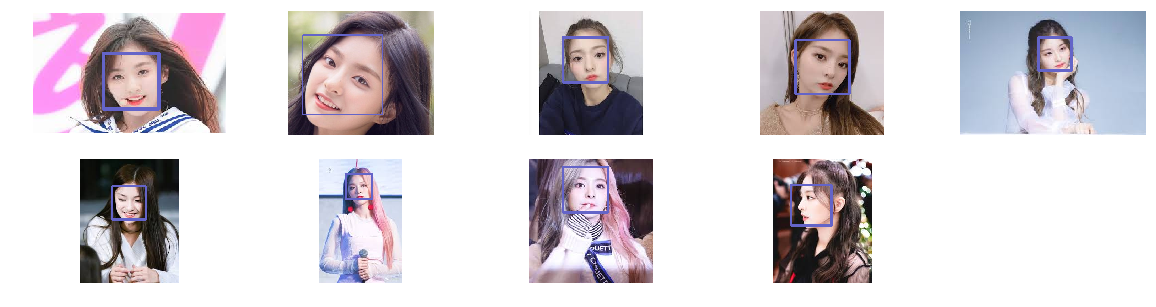

In [44]:

# 最後要記錄出的樣品向量(128 維度) 和標籤(明星名)
encodinglist = []
labels = []
# 一橫列畫幾個人
width = 5
# 總共幾個橫列
height = int(len(flist) / width) + 1
# 整個大圖的size
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
# Step1. 讀取檔案
    img = face_recognition.load_image_file(f)
# Step2. 把臉的降維向量算出, 用已經做好的cnn, [0] 第一張臉
    face_detect_and_encoding = face_recognition.face_encodings(img)
    #print(face_encoding[0])
# Step3. 抓出臉的方框, 我們這裡沒用到, 但如果你想畫框就會需要
# 這裡的face_locations 可以使用cnn(深度學習) 或者haar(固定特徵) 來得到
# 如果需要快速, 請使用haar, 如果需要更準確, 就使用cnn, 建議可以使用預設haar 即可
    if len(face_detect_and_encoding) <= 0:
        print("No faces found in the image!")
        continue
    else :
        face_encoding = face_detect_and_encoding[0]

    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
    
    #draw
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (100, 100, 200),thickness=3)
    print(str(right) + ' '+str(top) + ' '+str(bottom) + ' '+str(left))
# Step4. 把它加到我自己準備的list 裡
    encodinglist.append(face_encoding)
# Step5. 把檔名前面的人名split 出來
    name = os.path.split(f)[-1].split(".")[0]
# Step6. 把人名到我自己準備的list
    labels.append(name)
# 利用enumerate 得到的i 指定subplot
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)

In [31]:
unknown_flist =['./images/子瑜9.jpg']

In [ ]:
# 秀一下志玲的臉降維過後的向量
print("維度:", len(encodinglist[0]))
encodinglist[0]

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
width = 3
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
    img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(img)[0]
    # (top, right, bottom, left)
    (top, right, bottom, left) = face_recognition.face_locations(img)[0]
    # rectangle(要畫的圖, 左上座標, 右下座標, 顏色, 粗細)
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), size)
    font = cv2.FONT_HERSHEY_DUPLEX
    # face_distance-> 算跟妳傳進去的encodinglist 每一個距離
    results = face_recognition.face_distance(encodinglist, face_encoding)
    # 這裡使用argmin(axis=-1) 稍微難一點, 是得到群集裡最小值的index 部分
    name = labels[np.array(results).argmin(axis=-1)]
    labels.append(name)
    # 把文字放到我的圖上, 文字放在框右移6, 上移15 的位置
    # putText(圖片, 標籤, 起始座標, 字型, 字型大小, 顏色, 粗細)
    # 這裡我有刻意根據框的大小調整字體大小, 如果讀者沒特別需求可以都設成1
    cv2.putText(img, name, (left + 6, bottom - 15),
    font, (right-left)//100 ,
    (255, 255, 255), (right-left)//75)
    plt.subplot(height, width, i + 1)
    plt.title("Predict:" + name)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
# 妳可以把跟所有臉的距離列出來, 最小值基本上就是我們的答案
img = face_recognition.load_image_file(unknown_flist[-1])
face_encoding = face_recognition.face_encodings(img)[0]
results = face_recognition.face_distance(encodinglist, face_encoding)
for (i, r) in enumerate(results):
    print("和", labels[i], "的距離:", r)